In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
data = pd.read_csv('RE_listings_condo_1.csv')

In [7]:
display(data.head())

,Unnamed: 0,price,address,proptype,region,city,bedrooms,bathrooms,sqft
0,0,699900,1101-183 Keefer Place,Apt/Condo,Downtown West,Vancouver,2,1,759
1,1,1275000,1005-1450 Pennyfarthing Drive,Apt/Condo,False Creek,Vancouver,2,2,1156
2,2,599000,1807-833 Homer Street,Apt/Condo,Downtown West,Vancouver,1,1,527
3,3,829000,1109-188 Keefer Street,Apt/Condo,Downtown East,Vancouver,3,2,875
4,4,599000,1101-58 Keefer Place,Apt/Condo,Downtown West,Vancouver,1,1,620


In [8]:
data_clean = data.drop(columns = 'Unnamed: 0')
data_clean['price_per_sqft'] = data['price']/data['sqft']
display(data_clean)

,price,address,proptype,region,city,bedrooms,bathrooms,sqft,price_per_sqft
0,699900,1101-183 Keefer Place,Apt/Condo,Downtown West,Vancouver,2,1,759,922.134387
1,1275000,1005-1450 Pennyfarthing Drive,Apt/Condo,False Creek,Vancouver,2,2,1156,1102.941176
2,599000,1807-833 Homer Street,Apt/Condo,Downtown West,Vancouver,1,1,527,1136.622391
3,829000,1109-188 Keefer Street,Apt/Condo,Downtown East,Vancouver,3,2,875,947.428571
4,599000,1101-58 Keefer Place,Apt/Condo,Downtown West,Vancouver,1,1,620,966.129032
...,...,...,...,...,...,...,...,...,...
545,678000,404-1355 Harwood Street,Apt/Condo,West End,Vancouver,1,1,740,916.216216
546,1388800,1803-1055 Homer Street,Apt/Condo,Yaletown,Vancouver,2,2,1020,1361.568627
547,798000,309-2388 Western Parkway,Apt/Condo,University (Ubc),Vancouver,2,2,835,955.688623
548,799000,1503-907 Beach Avenue,Apt/Condo,Yaletown,Vancouver,1,1,676,1181.952663


In [9]:
# Looking at a summary of the data to see what we got
print(data_clean.info())
print(data_clean.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           550 non-null    int64  
 1   address         550 non-null    object 
 2   proptype        550 non-null    object 
 3   region          550 non-null    object 
 4   city            550 non-null    object 
 5   bedrooms        550 non-null    int64  
 6   bathrooms       550 non-null    int64  
 7   sqft            550 non-null    int64  
 8   price_per_sqft  550 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 38.8+ KB
None
              price    bedrooms   bathrooms         sqft  price_per_sqft
count  5.500000e+02  550.000000  550.000000   550.000000      550.000000
mean   1.598369e+06    1.834545    1.849091  1092.289091     1299.064723
std    1.643417e+06    0.777582    0.832485   624.448824      501.729749
min    2.980000e+05    0.000000    1.0000

In [10]:
# Checking for missing data, just to be sure
data_clean.isna().sum()

price             0
address           0
proptype          0
region            0
city              0
bedrooms          0
bathrooms         0
sqft              0
price_per_sqft    0
dtype: int64

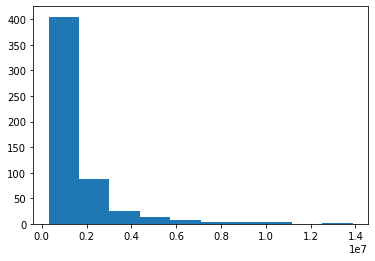

In [11]:
# Looking to histogram of the price
plt.hist(data_clean['price'])
plt.show()

In [12]:
print('Kurtosis: ' + str(data_clean['price'].kurt()))
print('Skewness: ' + str(data_clean['price'].skew()))

Kurtosis: 14.09958773266788
Skewness: 3.316613807718012


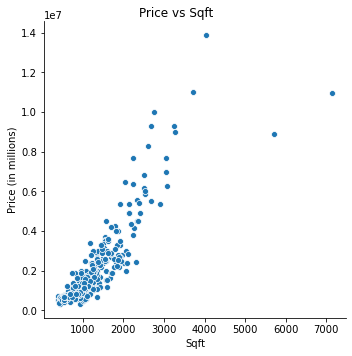

In [13]:
g = sns.relplot(x = 'sqft', y = 'price', data = data_clean, kind = 'scatter')
g.fig.suptitle('Price vs Sqft')
g.set(xlabel = 'Sqft', ylabel = 'Price (in millions)')
plt.show()

In [14]:
data_clean[data_clean['price'] == data_clean['price'].max()]

,price,address,proptype,region,city,bedrooms,bathrooms,sqft,price_per_sqft
401,13888800,3902-1550 Alberni Street,Apt/Condo,West End,Vancouver,3,4,4030,3446.352357


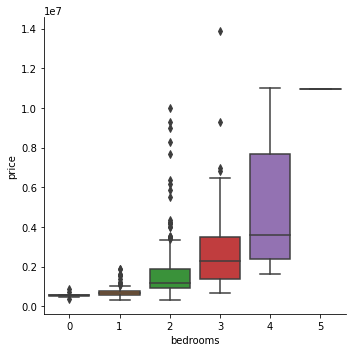

In [15]:
# How the number of bedrooms move with the price
g = sns.catplot(x = 'bedrooms', y= 'price', data = data_clean, kind = 'box')
plt.show()

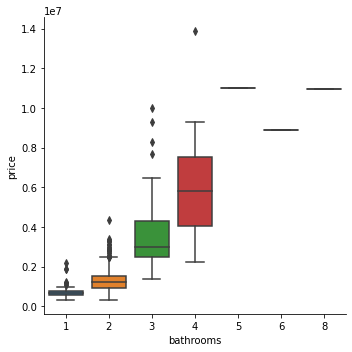

In [16]:
# How the number of bathrooms move with the price
g = sns.catplot(x = 'bathrooms', y= 'price', data = data_clean, kind = 'box')
plt.show()

In [17]:
data_by_region = data_clean.groupby('region')[['sqft','price', 'price_per_sqft']].mean().sort_values('price_per_sqft', ascending = False)
data_by_region['region_copy'] = data_by_region.index

In [18]:
# Question: Which places have the most valuable land? 
display(data_by_region)

,sqft,price,price_per_sqft,region_copy
region,,,,
Coal Harbour,1515.941176,2.966188e+06,1782.979922,Coal Harbour
South Granville,1060.000000,1.694000e+06,1583.513388,South Granville
West End,1319.888889,2.327807e+06,1533.580207,West End
Southlands,1184.800000,1.861520e+06,1532.349658,Southlands
Yaletown,1176.190476,1.903949e+06,1461.427186,Yaletown
Cambie,1073.086957,1.537370e+06,1378.752820,Cambie
Point Grey,1170.000000,1.639633e+06,1370.744677,Point Grey
Mount Pleasant East,992.115385,1.580465e+06,1357.318353,Mount Pleasant East
Fairview,1267.047619,1.853900e+06,1324.093916,Fairview


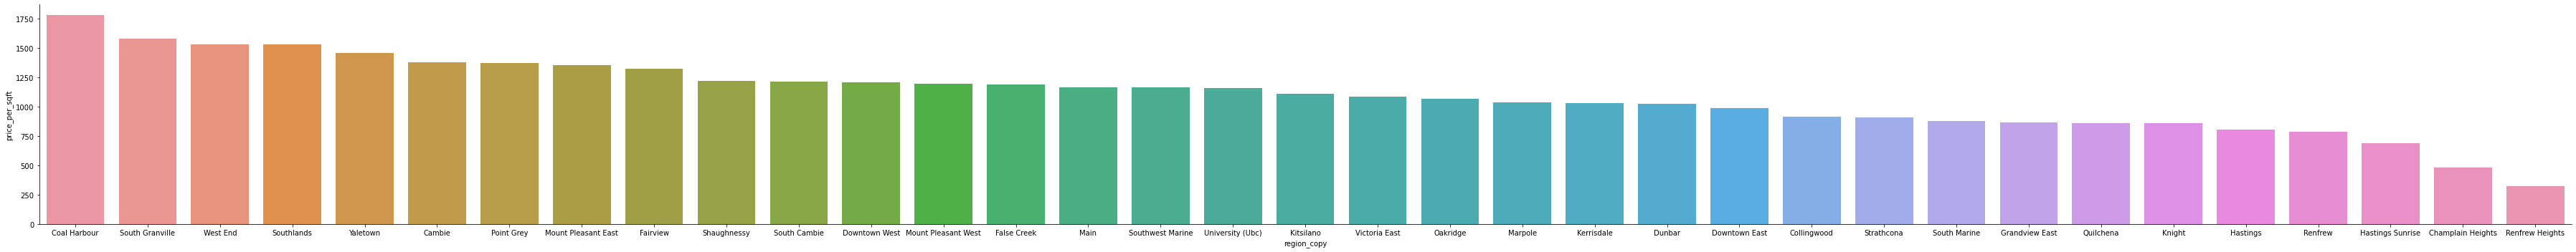

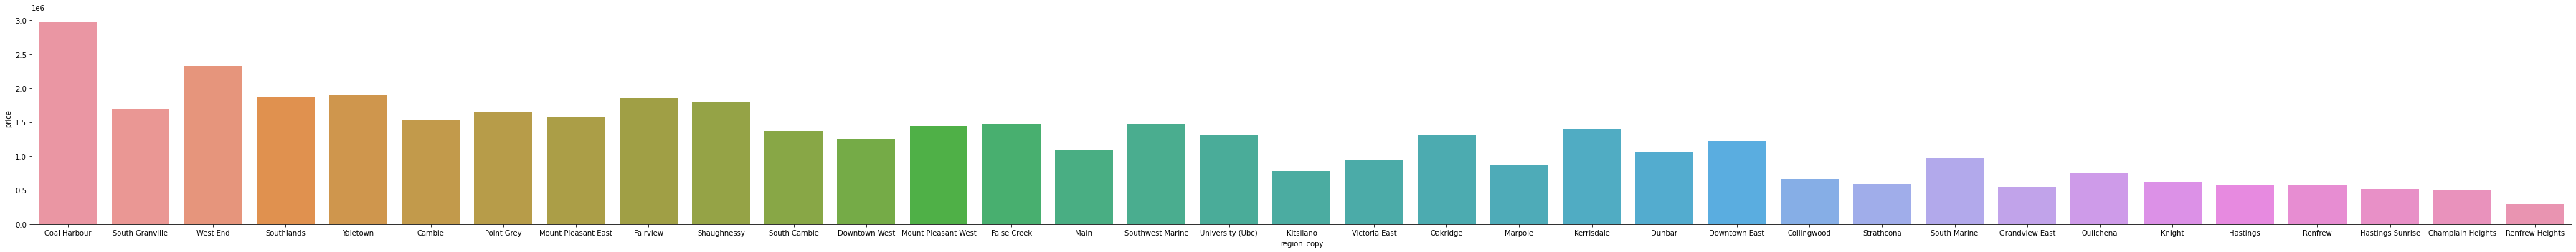

In [19]:
# How region affects prices
# Question I want to answer: do most places with highest price/sqft also have generally higher price? 

sns.catplot(x = 'region_copy', y= 'price_per_sqft', data = data_by_region, kind = 'bar', aspect =10, height =5)
sns.catplot(x = 'region_copy', y= 'price', data = data_by_region, kind = 'bar', aspect =10, height =5)
plt.show()

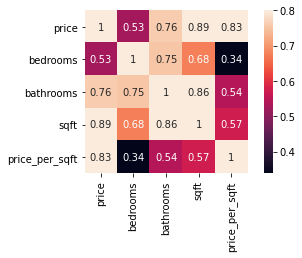

In [20]:
# Seeing which variables are the most correlated with price
# Note: suprised here because I would've thought bedrooms are more correlated with price
corrmat = data_clean.corr()
f, ax = plt.subplots(figsize = (6,3))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True)
plt.show()

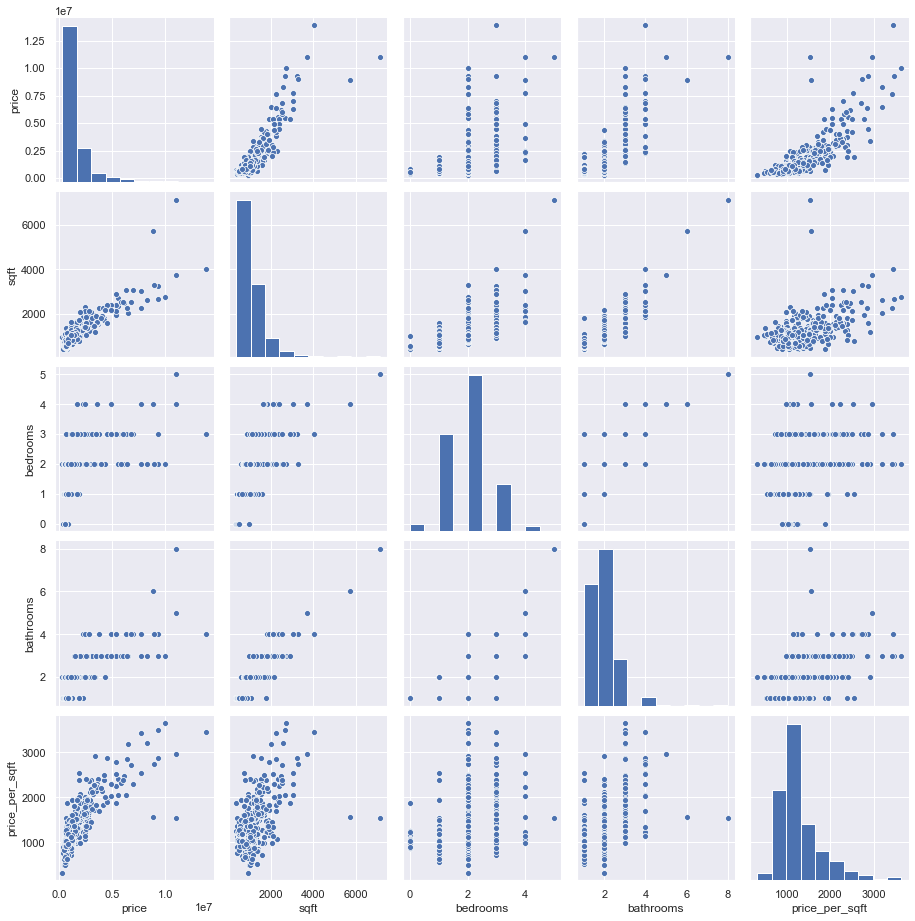

In [21]:
sns.set()
cols = ['price', 'sqft', 'bedrooms', 'bathrooms', 'price_per_sqft']
sns.pairplot(data_clean[cols])
plt.show()

## NOW STARTING MACHINE LEARNING PART ##

We found that the SQFT, bedrooms, and bathrooms is a good predictor of house price

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso

In [23]:
# Transform categorical data (region) into unique numerical values
regions = np.unique(data['region'])
print(regions)

['Cambie' 'Champlain Heights' 'Coal Harbour' 'Collingwood' 'Downtown East'
 'Downtown West' 'Dunbar' 'Fairview' 'False Creek' 'Grandview East'
 'Hastings' 'Hastings Sunrise' 'Kerrisdale' 'Kitsilano' 'Knight' 'Main'
 'Marpole' 'Mount Pleasant East' 'Mount Pleasant West' 'Oakridge'
 'Point Grey' 'Quilchena' 'Renfrew' 'Renfrew Heights' 'Shaughnessy'
 'South Cambie' 'South Granville' 'South Marine' 'Southlands'
 'Southwest Marine' 'Strathcona' 'University (Ubc)' 'Victoria East'
 'West End' 'Yaletown']


In [24]:
rle = LabelEncoder()
region_labels = rle.fit_transform(data['region'])
region_mappings = {index: label for index, label in 
                  enumerate(rle.classes_)}
region_mappings

{0: 'Cambie',
 1: 'Champlain Heights',
 2: 'Coal Harbour',
 3: 'Collingwood',
 4: 'Downtown East',
 5: 'Downtown West',
 6: 'Dunbar',
 7: 'Fairview',
 8: 'False Creek',
 9: 'Grandview East',
 10: 'Hastings',
 11: 'Hastings Sunrise',
 12: 'Kerrisdale',
 13: 'Kitsilano',
 14: 'Knight',
 15: 'Main',
 16: 'Marpole',
 17: 'Mount Pleasant East',
 18: 'Mount Pleasant West',
 19: 'Oakridge',
 20: 'Point Grey',
 21: 'Quilchena',
 22: 'Renfrew',
 23: 'Renfrew Heights',
 24: 'Shaughnessy',
 25: 'South Cambie',
 26: 'South Granville',
 27: 'South Marine',
 28: 'Southlands',
 29: 'Southwest Marine',
 30: 'Strathcona',
 31: 'University (Ubc)',
 32: 'Victoria East',
 33: 'West End',
 34: 'Yaletown'}

In [25]:
data_clean['regionlabel'] = region_labels

In [26]:
print(data_clean.head())

     price                        address   proptype         region  \
0   699900          1101-183 Keefer Place  Apt/Condo  Downtown West   
1  1275000  1005-1450 Pennyfarthing Drive  Apt/Condo    False Creek   
2   599000          1807-833 Homer Street  Apt/Condo  Downtown West   
3   829000         1109-188 Keefer Street  Apt/Condo  Downtown East   
4   599000           1101-58 Keefer Place  Apt/Condo  Downtown West   

        city  bedrooms  bathrooms  sqft  price_per_sqft  regionlabel  
0  Vancouver         2          1   759      922.134387            5  
1  Vancouver         2          2  1156     1102.941176            8  
2  Vancouver         1          1   527     1136.622391            5  
3  Vancouver         3          2   875      947.428571            4  
4  Vancouver         1          1   620      966.129032            5  


In [27]:
# assigning target and values
y = data_clean['price'].values
X = data_clean[['sqft', 'bedrooms', 'bathrooms', 'regionlabel']].values

In [28]:
# making sure numbers are similar
print(len(y))
print(len(X))

550
550


In [29]:
# Measuring accuracy through running it once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
reg.score(X_test, y_test)

0.8246156520539633

In [30]:
# Measuring accuracy through cross validation 5 times
# Note: seems to be much lower, lets try to put categorical data in
reg = LinearRegression()
cv_results = cross_val_score(reg, X ,y,cv=4)
print('This ML is ' + str(cv_results.mean()) + ' accurate')

This ML is 0.7690624055941907 accurate


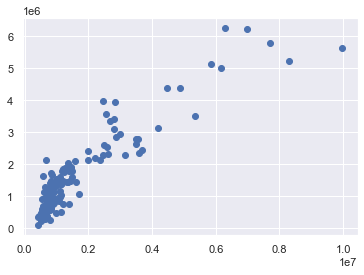

In [31]:
# Measuring accuracy through running it once
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)
reg = LinearRegression()
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)

plt.scatter(y_test, predictions)


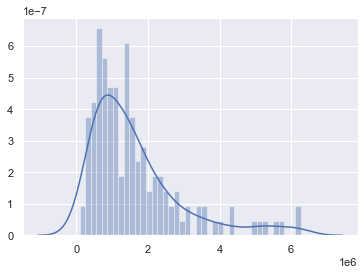

In [32]:
sns.distplot(predictions, bins = 40)